<a href="https://colab.research.google.com/github/jullysilva/TES_ATV_0/blob/main/praticarepo_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importar bibliotecas necessárias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import os
for dirname, _, filenames in os.walk('/content/data/'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [3]:
# para ler o arquivo de entrada
github_data_df = pd.read_csv('/content/sample_data/Github_data.csv')

In [ ]:
# Uma rápida olhada nos dados
github_data_df.head()

,Unnamed: 0.1,Unnamed: 0,topic,name,user,star,fork,watch,issue,pull_requests,...,topic_tag,discription_text,discription_url,commits,branches,packages,releases,contributers,License,url
0,0,0,Data-Science,keras,keras-team,47.9k,18.1k,2.1k,"2,940",87,...,"['deep-learning', 'tensorflow', 'neural-networ...",Deep Learning for humans,http://keras.io/,"5,342",6,0,0,49,View license,https://github.com/keras-team/keras
1,1,1,Data-Science,scikit-learn,scikit-learn,40.3k,19.6k,2.2k,"1,505",764,...,"['machine-learning', 'python', 'statistics', '...",scikit-learn: machine learning in Python,https://scikit-learn.org,"25,405",21,0,0,108,View license,https://github.com/scikit-learn/scikit-learn
2,2,2,Data-Science,PythonDataScienceHandbook,jakevdp,23.1k,9.9k,1.5k,65,67,...,"['scikit-learn', 'numpy', 'python', 'jupyter-n...",Python Data Science Handbook: full text in Jup...,http://jakevdp.github.io/PythonDataSc…,234,5,0,0,0,View license,https://github.com/jakevdp/PythonDataScienceHa...
3,3,3,Data-Science,Probabilistic-Programming-and-Bayesian-Methods...,CamDavidsonPilon,21k,6.6k,1.4k,127,38,...,"['bayesian-methods', 'pymc', 'mathematical-ana...","aka ""Bayesian Methods for Hackers"": An introdu...",http://camdavidsonpilon.github.io/Pro…,"1,079",3,0,0,0,MIT,https://github.com/CamDavidsonPilon/Probabilis...
4,4,4,Data-Science,Data-Science--Cheat-Sheet,abhat222,18.4k,8.2k,1.5k,7,0,...,[],Cheat Sheets,NaN,363,3,0,0,0,Fetching contributors,https://github.com/abhat222/Data-Science--Chea...


In [ ]:
#Vamos remover as colunas Unnamed: 0 e Unnamed: 0.1, pois são apenas subíndices e são triviais


github_data_df = github_data_df.drop(['Unnamed: 0','Unnamed: 0.1'],axis=1)


In [ ]:
# Obter informações básicas sobre o conjunto de dados
github_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   topic             1500 non-null   object 
 1   name              1500 non-null   object 
 2   user              1500 non-null   object 
 3   star              1500 non-null   object 
 4   fork              1500 non-null   object 
 5   watch             1500 non-null   object 
 6   issue             1500 non-null   object 
 7   pull_requests     1500 non-null   object 
 8   projects          1313 non-null   float64
 9   topic_tag         1500 non-null   object 
 10  discription_text  1480 non-null   object 
 11  discription_url   669 non-null    object 
 12  commits           1500 non-null   object 
 13  branches          1500 non-null   object 
 14  packages          1500 non-null   int64  
 15  releases          1500 non-null   int64  
 16  contributers      1500 non-null   object 


In [ ]:
#Selecionando colunas mais relevantes

github_df = github_data_df[['topic','name','user','star','fork','watch','issue','pull_requests','topic_tag','commits','contributers']]

In [ ]:
#renomeando colunas para nomes melhores
new_names = ['Topic','Repo_Name','User_Name','Star','Fork','Watch','Issues','Pull_Requests',
             'Topic_Tags','Commits','Contributors']
old_names = github_df.columns
github_df = github_df.rename(columns=dict(zip(old_names, new_names)))

In [ ]:
# Certificar-se de que as colunas sejam renomeadas adequadamente

github_df.head(2)

,Topic,Repo_Name,User_Name,Star,Fork,Watch,Issues,Pull_Requests,Topic_Tags,Commits,Contributors
0,Data-Science,keras,keras-team,47.9k,18.1k,2.1k,"2,940",87,"['deep-learning', 'tensorflow', 'neural-networ...","5,342",49
1,Data-Science,scikit-learn,scikit-learn,40.3k,19.6k,2.2k,"1,505",764,"['machine-learning', 'python', 'statistics', '...","25,405",108


In [ ]:
#Vamos converter as colunas de Estrelas (Star), Forks e Visualizações (Watch) para valores numéricos, substituindo 'k' por 1000.
github_df['Star'] = github_df['Star'].apply(lambda x: float(x.rstrip('k'))*1000 if x.endswith('k') else float(x))
github_df['Fork'] = github_df['Fork'].apply(lambda x: float(x.rstrip('k'))*1000 if x.endswith('k') else float(x))
github_df['Watch'] = github_df['Watch'].apply(lambda x: float(x.rstrip('k'))*1000 if 'k' in x else float(x))

In [ ]:
#Remover ',' das colunas de problemas (issue) e commits
github_df['Issues'] = github_df['Issues'].apply(lambda x: x.replace(',',''))
github_df['Commits'] = github_df['Commits'].apply(lambda x: x.replace(',',''))

In [ ]:
# Converter várias colunas de tipo objeto para inteiros
cols = ['Issues','Pull_Requests','Commits','Contributors']

github_df[cols] = github_df[cols].apply(pd.to_numeric, errors='coerce', axis=1)

In [ ]:
#Verificar os tipos das colunas

github_df.dtypes

Topic             object
Repo_Name         object
User_Name         object
Star             float64
Fork             float64
Watch            float64
Issues           float64
Pull_Requests    float64
Topic_Tags        object
Commits          float64
Contributors     float64
dtype: object

In [ ]:
#Exibir detalhes estatísticos básicos sobre as colunas
github_df.describe()

,Star,Fork,Watch,Issues,Pull_Requests,Commits,Contributors
count,1500.000000,1500.000000,1500.000000,1499.000000,1499.000000,1500.000000,1495.000000
mean,8058.556667,1845.994667,380.881333,116.228152,15.527685,2535.753333,28.657525
std,17031.342041,4572.215953,754.014969,344.511792,55.227818,21605.630660,79.740051
min,4.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,576.000000,109.000000,37.000000,2.000000,0.000000,50.000000,0.000000
50%,1800.000000,385.500000,108.000000,14.000000,2.000000,196.000000,0.000000
75%,9025.000000,1700.000000,416.000000,72.500000,9.000000,953.500000,20.000000
max,310000.000000,80900.000000,8400.000000,4337.000000,851.000000,797646.000000,877.000000


#Análise dos principais repositórios com base na popularidade





**O que torna um repositório do GitHub popular? Essa pergunta pode ser respondida com 3 métricas - Star, Watch e Fork.**

Star - Quando um usuário gosta do seu repositório ou deseja mostrar apreço, eles marcam com uma Estrela (Star).

Watch - Quando um usuário deseja ser notificado de todas as atividades em um repositório, eles o acompanham (Watch).

Fork - Quando um usuário quer uma cópia do repositório ou deseja fazer contribuições, eles tendem a fazer um Fork.

In [ ]:
# Criar um DataFrame com valores médios das colunas para todos os tópicos.

pop_mean_df = github_df.groupby('Topic').mean().reset_index()

<ipython-input-14-3111d8d67c9a>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  pop_mean_df = github_df.groupby('Topic').mean().reset_index()


In [ ]:
pop_mean_df

,Topic,Star,Fork,Watch,Issues,Pull_Requests,Commits,Contributors
0,Android-studio,121.43,39.42,10.07,7.120000,0.350000,113.66,3.900000
1,Arduino,1979.69,839.55,168.55,82.390000,12.210000,1083.87,21.410000
2,Computer-Vision,4925.00,1537.83,283.24,133.220000,14.150000,1462.67,10.270000
3,Data-Science,6669.00,2145.86,400.22,146.950000,20.620000,2732.74,29.561224
4,GAN,2440.45,668.75,122.66,41.120000,3.230000,425.29,9.850000
5,Open-CV,271.49,133.17,26.17,5.210000,2.150000,40.56,0.820000
6,Raspberry pi,1515.87,330.78,124.25,47.520000,4.750000,9041.52,29.410000
7,awesome,1653.00,279.10,113.20,14.200000,2.090000,205.36,0.940000
8,c++,19380.35,3656.02,874.50,234.800000,30.310000,6349.22,52.595960
9,flutter,3556.83,666.05,131.05,53.373737,4.920000,638.29,20.240000


**1.1 Análise de Stars**

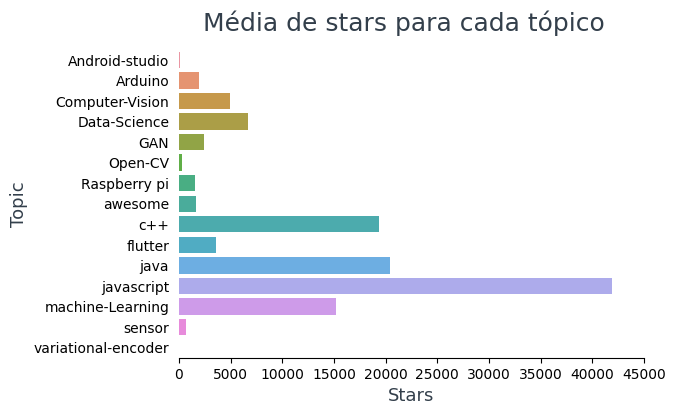

In [ ]:
# set figure size and dpi
fig, ax = plt.subplots(figsize=(6,4), dpi=100)

# add colors to xticks, yticks and edge
plt.rcParams['axes.edgecolor']='#333F4B'

# customize spines and tick parameters
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.tick_params(axis='both', which='both', labelsize=10, bottom=True, left=False)
ax.set_xlim(0,45000)

# remove grid and set background color
ax.grid(False)
ax.set_facecolor('white')

# plot the data
sns.barplot(data=pop_mean_df, x='Star', y='Topic');

# set x and y-axis labels and title
ax.set_xlabel('Stars', fontsize=13, color = '#333F4B')
ax.set_ylabel('Topic', fontsize=13, color = '#333F4B')
fig.suptitle('Média de stars para cada tópico',fontsize=18, color = '#333F4B');

In [ ]:
# top 10 most starred repos
github_df.nlargest(n=10, columns='Star')[['Repo_Name','Topic','Star']]

,Repo_Name,Topic,Star
1000,freeCodeCamp,javascript,310000.0
1001,vue,javascript,163000.0
1002,react,javascript,147000.0
100,tensorflow,machine-Learning,144000.0
1003,bootstrap,javascript,140000.0
1004,You-Dont-Know-JS,javascript,120000.0
1100,coding-interview-university,c++,110000.0
800,CS-Notes,java,98400.0
1101,CS-Notes,c++,98400.0
801,javascript,java,94800.0


In [ ]:
# Dica Rápida: '\033[1m' imprime uma string em negrito e '\033[0m' a imprime de volta normalmente.

print('Most starred repository is {}{}{} in the topic {}{}{} with {}{}{} stars'.
      format('\033[1m',github_df.iloc[github_df['Star'].idxmax()]['Repo_Name'],'\033[0m',
             '\033[1m',github_df.iloc[github_df['Star'].idxmax()]['Topic'],'\033[0m',
            '\033[1m',github_df.iloc[github_df['Star'].idxmax()]['Star'],'\033[0m'))

Most starred repository is freeCodeCamp in the topic javascript with 310000.0 stars


Nos 10 repositórios com mais estrelas, 4 são frameworks (vue, react, tensorflow, bootstrap) e 6 deles são relacionados ao JavaScript.






**#1.2 Análise de Acompanhamentos (Watch)**






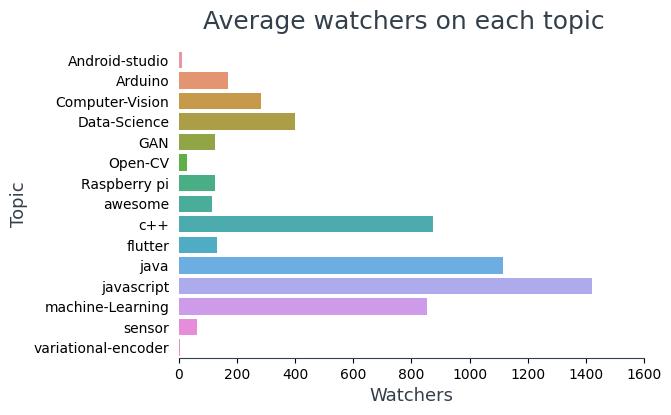

In [ ]:
# set figure size and dpi
fig, ax = plt.subplots(figsize=(6,4), dpi=100)

# add colors to xticks, yticks and edge
plt.rcParams['axes.edgecolor']='#333F4B'

# customize spines and tick parameters
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.tick_params(axis='both', which='both', labelsize=10, bottom=True, left=False)
ax.set_xlim(0,1600)

# remove grid and set background color
ax.grid(False)
ax.set_facecolor('white')

# plot the data
sns.barplot(data=pop_mean_df, x='Watch', y='Topic');

# set x and y-axis labels and title
ax.set_xlabel('Watchers', fontsize=13, color = '#333F4B')
ax.set_ylabel('Topic', fontsize=13, color = '#333F4B')
fig.suptitle('Média de watchers para cada tópico',fontsize=18, color = '#333F4B');

In [ ]:
# top 10 most watched repos
github_df.nlargest(n=10, columns='Watch')[['Repo_Name','Topic','Watch']]

,Repo_Name,Topic,Watch
100,tensorflow,machine-Learning,8400.0
1000,freeCodeCamp,javascript,8400.0
1003,bootstrap,javascript,7200.0
1133,CodeHub,c++,6800.0
1002,react,javascript,6700.0
1001,vue,javascript,6100.0
1100,coding-interview-university,c++,5800.0
1010,free-programming-books-zh_CN,javascript,5500.0
1004,You-Dont-Know-JS,javascript,5400.0
800,CS-Notes,java,4800.0


In [ ]:
print('O repositório mais watched é {}{}{} no tópico {}{}'.
      format('\033[1m',github_df.iloc[github_df['Watch'].idxmax()]['Repo_Name'],'\033[0m',
             '\033[1m',github_df.iloc[github_df['Watch'].idxmax()]['Topic']))

O repositório mais watched é tensorflow no tópico machine-Learning


Nos 10 repositórios com mais acompanhamentos (watched), 4 são frameworks (tensorflow, bootstrap, react, vue), 6 são relacionados ao JavaScript e 5 deles contêm conteúdo de aprendizado para programadores.


##1.3 Análise de Fork


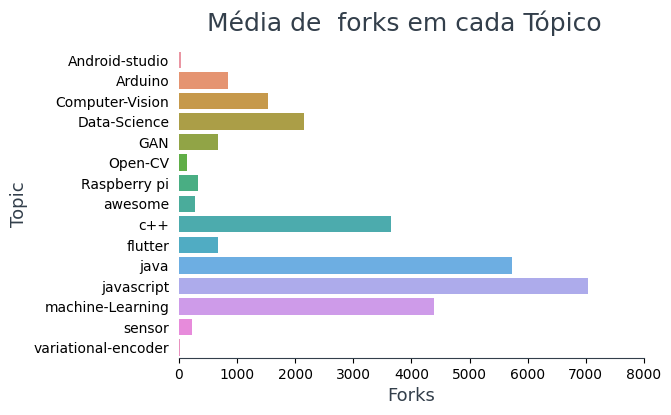

In [ ]:
# set figure size and dpi
fig, ax = plt.subplots(figsize=(6,4), dpi=100)

# add colors to xticks, yticks and edge
plt.rcParams['axes.edgecolor']='#333F4B'

# customize spines and tick parameters
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.tick_params(axis='both', which='both', labelsize=10, bottom=True, left=False)
ax.set_xlim(0,8000)

# remove grid and set background color
ax.grid(False)
ax.set_facecolor('white')

# plot the data
sns.barplot(data=pop_mean_df, x='Fork', y='Topic');

# set x and y-axis labels and title
ax.set_xlabel('Forks', fontsize=13, color = '#333F4B')
ax.set_ylabel('Topic', fontsize=13, color = '#333F4B')
fig.suptitle('Média de  forks em cada Tópico',fontsize=18, color = '#333F4B');

In [ ]:
# top 10 most forked repos
github_df.nlargest(n=10, columns='Fork')[['Repo_Name','Topic','Fork']]

,Repo_Name,Topic,Fork
100,tensorflow,machine-Learning,80900.0
1003,bootstrap,javascript,68700.0
300,opencv,Computer-Vision,34900.0
800,CS-Notes,java,32100.0
1100,coding-interview-university,c++,32100.0
1101,CS-Notes,c++,32100.0
806,spring-boot,java,29600.0
64,courses,Data-Science,28500.0
1002,react,javascript,28500.0
802,JavaGuide,java,26300.0


In [ ]:
print('O repositório mais forked é {}{}{} no tópico {}{}'.
      format('\033[1m',github_df.iloc[github_df['Fork'].idxmax()]['Repo_Name'],'\033[0m',
             '\033[1m',github_df.iloc[github_df['Fork'].idxmax()]['Topic']))

O repositório mais forked é tensorflow no tópico machine-Learning


Nos 10 repositórios com mais forks, 4 são frameworks (tensorflow, bootstrap, spring-boot, react) e 5 deles contêm conteúdo de aprendizado para programadores.






##**1.4 Relação entre Star, Forks e Watch**





Muitas vezes, os usuários fazem um fork de um repositório quando desejam contribuir para ele. Portanto, vamos explorar a relação entre estrelas-fork e Watch-fork.






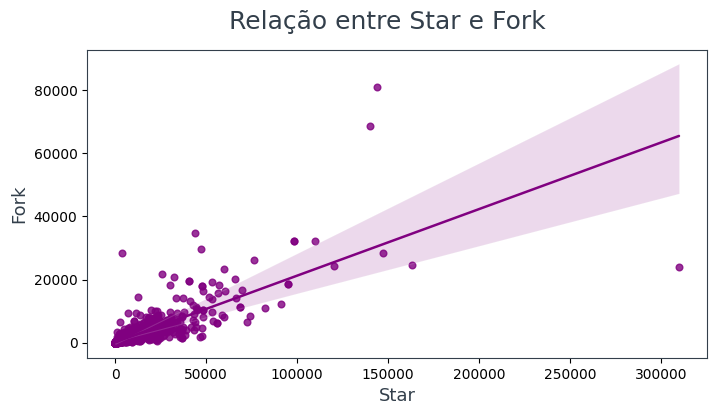

In [ ]:
# set figure size and dpi
fig, ax = plt.subplots(figsize=(8,4), dpi=100)

# set seaborn theme for background grids
sns.set_theme('paper')

# plot the data
sns.regplot(data=github_df, x='Star', y='Fork', color='purple');

# set x and y-axis labels and title
ax.set_xlabel('Star', fontsize=13, color = '#333F4B')
ax.set_ylabel('Fork', fontsize=13, color = '#333F4B')
fig.suptitle('Relação entre Star e Fork',fontsize=18, color = '#333F4B');

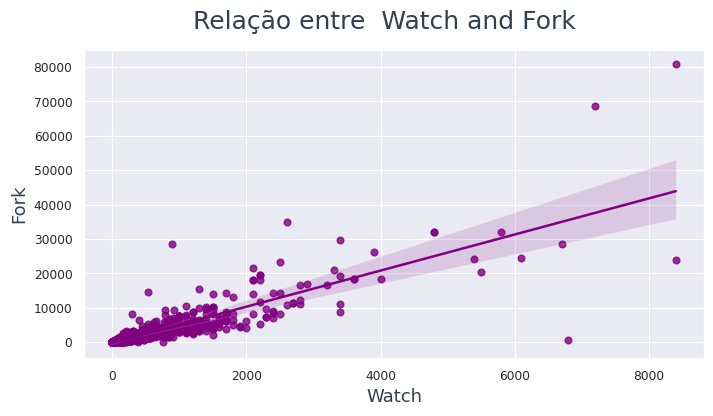

In [ ]:
# set figure size and dpi
fig, ax = plt.subplots(figsize=(8,4), dpi=100)

# set seaborn theme for background grids
sns.set_theme('paper')

# plot the data
sns.regplot(data=github_df, x='Watch', y='Fork', color='purple');

# set x and y-axis labels and title
ax.set_xlabel('Watch', fontsize=13, color = '#333F4B')
ax.set_ylabel('Fork', fontsize=13, color = '#333F4B')
fig.suptitle('Relação entre  Watch and Fork',fontsize=18, color = '#333F4B');

Os pontos de dados estão muito mais próximos da linha de regressão entre Watch e Forks em comparação com Star e Forks. A partir disso, podemos concluir que se um usuário está acompanhando um repositório, é muito provável que eles façam um fork dele.

##**2. Análise de usuários com mais repositórios**





In [ ]:
# create a list of top 10 users with more repositories
users_with_more_repos = github_df.groupby('User_Name').size().nlargest(n=10).reset_index(name='Count')['User_Name'].to_list()

In [ ]:
users_with_more_repos

['microsoft',
 'google',
 'adafruit',
 'alibaba',
 'PacktPublishing',
 'junyanz',
 'MicrocontrollersAndMore',
 'flutter',
 'dmlc',
 'rasbt']

In [ ]:
# create a dataframe using users_with_more_repos list
more_repos_users = github_df[github_df['User_Name'].isin(users_with_more_repos)][['Topic','User_Name','Star']]


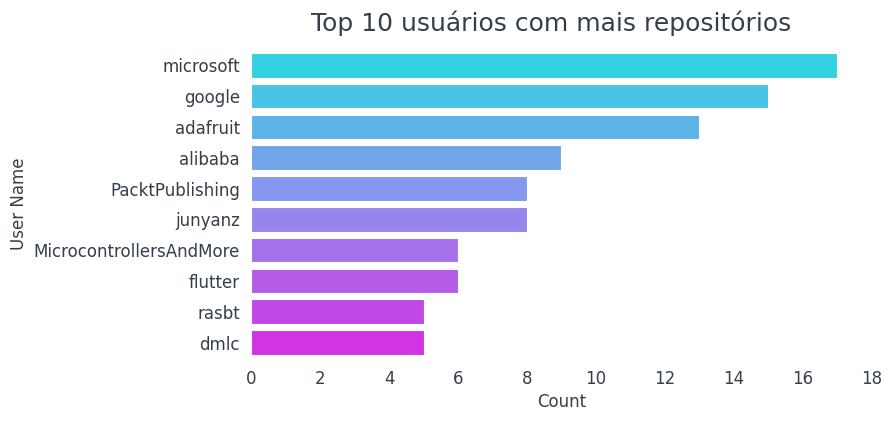

In [ ]:
# set figure size and dpi
fig, ax = plt.subplots(figsize=(8,4), dpi=100)

# add colors to xticks, yticks and change labelsize
plt.rcParams['xtick.color']='#333F4B'
plt.rcParams['xtick.labelsize']=12
plt.rcParams['ytick.color']='#333F4B'
plt.rcParams['ytick.labelsize']=12

# remove border
sns.despine(left=True, bottom=True)

ax.grid(False)
ax.set_facecolor('white')
ax.set_xlim(0,18)

# plot data
sns.countplot(data=more_repos_users,y='User_Name',palette = 'cool',
             order=more_repos_users['User_Name'].value_counts().index);

# set x and y-axis labels and title
ax.set_xlabel('Count', fontsize=12, color = '#333F4B')
ax.set_ylabel('User Name', fontsize=12, color = '#333F4B')
fig.suptitle('Top 10 usuários com mais repositórios',fontsize=18, color = '#333F4B');

Nos 10 principais usuários com mais repositórios, A Microsoft lidera a lista com 17 repositórios. O Google segue com 15 repositórios. 6 deles são empresas ou pertencem a uma empresa (Microsoft, Google, Adafruit, Alibaba, PacktPublishing, Flutter). 3 são usuários individuais (junyanz, rasbt, MicrocontrollersAndMore).

##**3. Compreendendo as atividades de contribuição nos repositórios**





O GitHub é famoso pelo seu gráfico de contribuições. Esse gráfico é um registro de todas as contribuições que um usuário fez. Sempre que um usuário faz um commit, abre um problema (issue) ou propõe um pull request, isso é considerado uma contribuição. Existem quatro colunas relacionadas a contribuições em nosso conjunto de dados: Issues, Pull_Requests, Commits, Contributors. Vamos ver se há alguma relação real entre elas.






In [ ]:
#Excluir as linhas com valores nulos e criar um DataFrame apenas com as colunas de contribuição.
corr_df = github_df.dropna(axis=0, subset = ['Issues','Pull_Requests','Commits','Contributors'])[['Issues','Pull_Requests','Commits','Contributors']]

In [ ]:
# correlation between the contribution columns
corr_df.corr()

,Issues,Pull_Requests,Commits,Contributors
Issues,1.000000,0.657109,0.173512,0.394396
Pull_Requests,0.657109,1.000000,0.149034,0.296447
Commits,0.173512,0.149034,1.000000,0.149003
Contributors,0.394396,0.296447,0.149003,1.000000


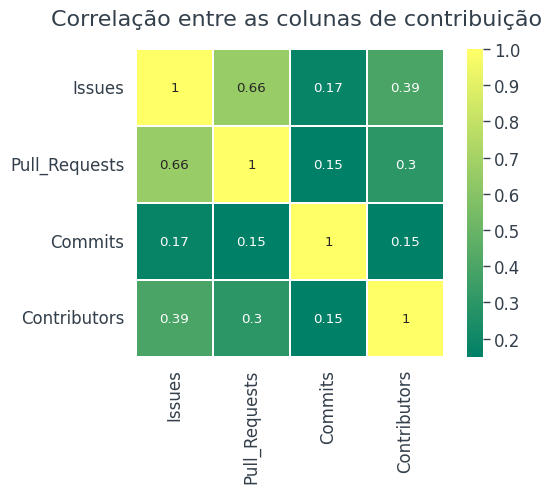

In [ ]:
# set figure size and dpi
fig, ax = plt.subplots(figsize=(6,4), dpi=100)

# plot the correlation in a heatmap
sns.heatmap(corr_df.corr(), linewidths=0.1, vmax=1.0, square=True, linecolor='white', annot=True, cmap='summer');
fig.suptitle('Correlação entre as colunas de contribuição',fontsize=16, color = '#333F4B');

O número de Commits não depende nem de problemas (issues), nem de pull requests ou contribuidores. Existe uma relação moderadamente positiva entre Problemas (Issues) e Pull Requests. Vamos explorar os 100 repositórios mais populares e ver se é o mesmo.

In [ ]:
popular_df = github_df.nlargest(n=100,columns=['Star'])[['Issues','Pull_Requests','Commits','Contributors']]

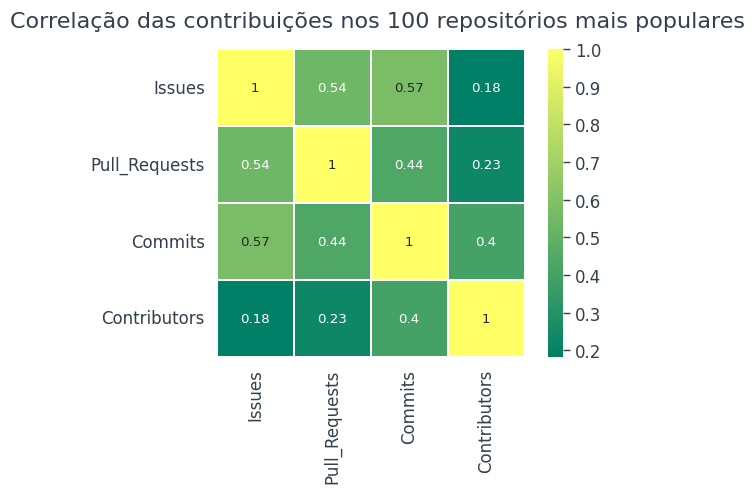

In [ ]:
# set figure size and dpi
fig, ax = plt.subplots(figsize=(6,4), dpi=100)

# plot the correlation in a heatmap
sns.heatmap(popular_df.corr(), linewidths=0.1, vmax=1.0, square=True, linecolor='white', annot=True, cmap='summer');
fig.suptitle('Correlação das contribuições nos 100 repositórios mais populares',fontsize=16, color = '#333F4B');

É quase o mesmo nos 100 repositórios mais populares em comparação com o conjunto de dados geral.
Vamos verificar para usuários com mais repositórios.

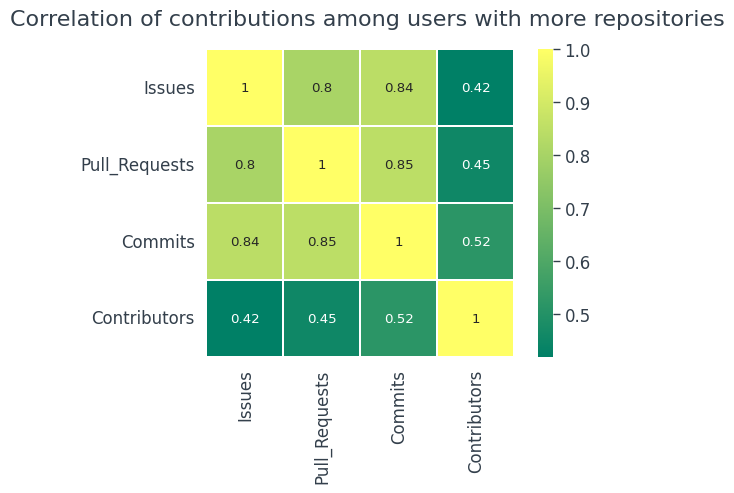

In [ ]:
# create a dataframe using users_with_more_repos list
more_repos_users_df = github_df[github_df['User_Name'].isin(users_with_more_repos)][['Issues','Pull_Requests','Commits','Contributors']]

# set figure size and dpi
fig, ax = plt.subplots(figsize=(6,4), dpi=100)

# plot the correlation in a heatmap
sns.heatmap(more_repos_users_df.corr(), linewidths=0.1, vmax=1.0, square=True, linecolor='white', annot=True, cmap='summer');
fig.suptitle('Correlation of contributions among users with more repositories',fontsize=16, color = '#333F4B');

***Surpreendentemente***, usuários com mais repositórios tendem a ser mais ativos. Há uma correlação positiva razoavelmente forte entre:

* Commits e Pull requests
* Commits e Issues
* Issues e Pull requests

**No que diz respeito às contribuições:**

Não há uma relação real entre as atividades de contribuição no conjunto de dados geral.
Não há correlação entre as contribuições nos 100 repositórios mais populares.
Se os usuários tendem a ter mais repositórios, então as chances de contribuições são consideravelmente maiores.

### 4. Análise de Topic Tags
Adicionar etiquetas a um repositório é uma maneira de classificá-lo com tópicos. Isso ajuda outros usuários a encontrar e contribuir para esse repositório.

In [ ]:
# let's look at the topic_tags column
github_df['Topic_Tags'].head()

0    ['deep-learning', 'tensorflow', 'neural-networ...
1    ['machine-learning', 'python', 'statistics', '...
2    ['scikit-learn', 'numpy', 'python', 'jupyter-n...
3    ['bayesian-methods', 'pymc', 'mathematical-ana...
4                                                   []
Name: Topic_Tags, dtype: object

In [ ]:
import ast
from collections import Counter

# convert column to list of lists
topic_tags = github_df['Topic_Tags'].apply(lambda x: ast.literal_eval(x)).tolist()

# split all lists and select individual items
all_tags = [tag for topic in topic_tags for tag in topic]

# count the occurrence of each tag
tags_dict = Counter(all_tags)

In [ ]:
# create a dataframe with most tags
toptags_df = pd.DataFrame(tags_dict.most_common(15), columns=['Name of the Tag','Count'])

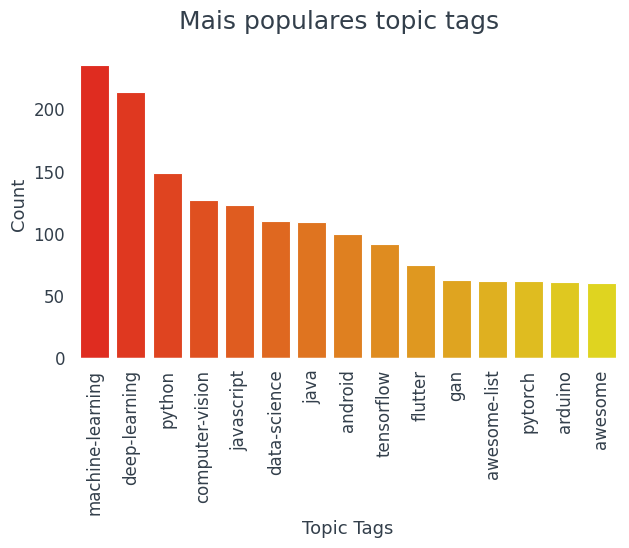

In [ ]:
# set figure size and dpi
fig, ax = plt.subplots(figsize=(7,4), dpi=100)

# rotate the labels along x-axis
plt.xticks(rotation=90)

ax.grid(False)
ax.set_facecolor('white')
sns.despine()

# plot the data
sns.barplot(data=toptags_df, x='Name of the Tag', y='Count', palette='autumn');

# set x and y-axis labels and title
ax.set_xlabel('Topic Tags', fontsize=13, color = '#333F4B')
ax.set_ylabel('Count', fontsize=13, color = '#333F4B')
fig.suptitle('Mais populares topic tags',fontsize=18, color = '#333F4B');

Das 15 etiquetas mais populares, 10 pertencem ao mundo da ciência de dados.






In [ ]:
# len of tags list in each column
len_tags = [len(tag) for tag in topic_tags]

# create a new column -> total_tags
github_df['Total_Tags'] = len_tags

# group based on topic and calculate total_tags in each topic
topic_wise_tags = github_df.groupby('Topic').sum()['Total_Tags'].reset_index(name='Total Tags')

<ipython-input-43-bad7efe95428>:8: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  topic_wise_tags = github_df.groupby('Topic').sum()['Total_Tags'].reset_index(name='Total Tags')


<ipython-input-44-059367c17024>:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=topic_wise_tags,x='Total Tags', y='Topic', ci=None, palette='gist_rainbow');


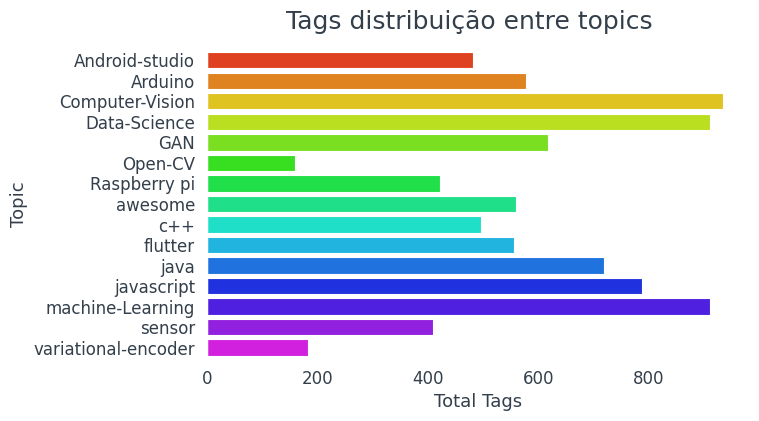

In [ ]:
# set figure size and dpi
fig, ax = plt.subplots(figsize=(7,4), dpi=100)

# remove background grids
ax.grid(False)
ax.set_facecolor('white')
sns.despine()

# plot the data
sns.barplot(data=topic_wise_tags,x='Total Tags', y='Topic', ci=None, palette='gist_rainbow');

# set x and y-axis labels and title
ax.set_xlabel('Total Tags', fontsize=13, color = '#333F4B')
ax.set_ylabel('Topic', fontsize=13, color = '#333F4B')
fig.suptitle('Tags distribuição entre topics',fontsize=18, color = '#333F4B');

Repositories with topics Computer Vision, Data Science and Machine Learning tend to be tagged more.

In [ ]:
# import package and its set of stopwords
from wordcloud import WordCloud, STOPWORDS
from PIL import Image

In [ ]:
# create a string with all the topic tags
github_tags = (" ").join(all_tags)

# assign the mask image to a variable
git_mask = np.array(Image.open('/content/data/github_icon.jpg'))

# instantiate a word cloud object
tags_wc = WordCloud(
    mask = git_mask,
    background_color='white',
    max_font_size=120,
    max_words=200,
)

# generate the word cloud
tags_wc.generate(github_tags)

plt.figure(figsize=(6,6),dpi=100)
plt.imshow(tags_wc, interpolation='bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.title('Tags mais comuns usadas em repositórios do GitHub',fontdict={'size': 15,'color': 'orange','verticalalignment': 'center'})
plt.show()

NameError: ignored

#**Inferência:**

Dentre os 10 repositórios com mais estrelas,  watched e forks, 4 são frameworks. O repositório mais watched e forked é o TensorFlow. Se um usuário está acompanhando um repositório, é muito provável que eles façam um fork dele. A Microsoft e o Google tendem a ser usuários com repositórios mais populares. Nos 10 principais usuários com mais repositórios populares, 6 são empresas. Não há uma relação real entre atividades de contribuição (Issues, Pull requests, Commits). As tags mais usadas são Aprendizado de Máquina (Machine Learning), Aprendizado Profundo (Deep Learning), Python, Visão Computacional (Computer Vision) e JavaScript. Repositórios com tópicos como Visão Computacional, Ciência de Dados (Data Science) e Aprendizado de Máquina têm mais tags.